<a href="https://colab.research.google.com/github/HarimJung/TensorFlow/blob/master/AI_develop_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Be the AI Engineer

# Pima indian blood sugar anticipation

In [0]:
# data vs normalized data, has range for max as 1 and min as -1
# so with the features with one sample A, we could get the anticipated result of sample A's probability.

In [0]:
# our purpose is to find the weight-randomly
# get the all sum- hypothesis formed as w1x1+w2x2+...+wnxn
# convert it as sigmoid function,not linear- activation function.

# ( 1* n ) * ( n*1 ) form = 1*1 form w1x1+w2x2+...+wnxn
# so get the H(x)=wx+b activation function, beacuse x values are already given

# end up the ultimate value is either 0 or 1.

# so the check the cost(w) with variable w1...wn values to update
# so replace the updated w values in loop


# random w- activation function- sigmoid - W cost funtion- updated w values- loop each values.
# so get the best-optimized values and then keep it. the total Cost(W) = 0 . that gradient descent call for 0

# 여기서 업데이트 w 라는 것은 w=(w1, w2,w3....wn)을 말하고



In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd
tf.set_random_seed(777)

In [11]:
from google.colab import files
uploaded=files.upload()

Saving data-03-diabetes.csv to data-03-diabetes.csv


In [12]:
!ls

data-03-diabetes.csv  sample_data


In [0]:
xy= np.loadtxt("data-03-diabetes.csv", delimiter=",", dtype=np.float32)

In [14]:
x_data=xy[:,0:-1]
y_data=xy[:,[-1]] # target value 를 y 로 지정

print(x_data.shape,y_data.shape)


(759, 8) (759, 1)


In [0]:
X=tf.placeholder(tf.float32,shape=[None,8])# 하나의 행렬을 none by 8 행렬, 가변적이다.
Y=tf.placeholder(tf.float32,shape=[None,1])

W=tf.Variable(tf.random_normal([8,1]),name="weight")# 벡터로 표시
b=tf.Variable(tf.random_normal([1]),name="bias")

hypo=tf.sigmoid(tf.matmul(X,W)+b)

cost=-tf.reduce_mean(Y* tf.log(hypo)+(1-Y)*tf.log(1-hypo))

train=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# w의 갱신. 개선이 트레인을 통해 계속 나아감

In [23]:
predicted=tf.cast(hypo>0.5, dtype=tf.float32)# 소숫점 잘라주는, 반올림 0.5 보다 크면 1 적으면 0
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))
# 진짜값 Y 와 predicted 가 같은가 아닌가. 
# cast 해서 맞으면 1 틀리면 0 다 더해서 평균내서 가장 작은것.

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(10001):
    cost_val,_=sess.run([cost,train],feed_dict={X:x_data, Y:y_data})
    if step%200 ==0:
      print (step,cost_val)
      
  h,c,a=sess.run([hypo,predicted,accuracy],feed_dict={X:x_data, Y:y_data})

print("\n hypo is:" ,h, "/nCorrect(Y):", c, "\nAccuracy:", a)

0 0.82793975
200 0.7551809
400 0.7263554
600 0.70517904
800 0.6866306
1000 0.669853
1200 0.654603
1400 0.64073646
1600 0.6281296
1800 0.616668
2000 0.6062456
2200 0.59676415
2400 0.58813345
2600 0.58027065
2800 0.5731005
3000 0.5665548
3200 0.5605714
3400 0.55509466
3600 0.55007464
3800 0.5454662
4000 0.54122907
4200 0.5373273
4400 0.53372866
4600 0.5304045
4800 0.52732897
5000 0.5244792
5200 0.5218346
5400 0.519377
5600 0.51708966
5800 0.514958
6000 0.5129687
6200 0.5111098
6400 0.50937057
6600 0.5077413
6800 0.50621307
7000 0.5047781
7200 0.5034291
7400 0.50215966
7600 0.5009635
7800 0.4998357
8000 0.49877086
8200 0.49776477
8400 0.49681315
8600 0.49591216
8800 0.49505854
9000 0.49424884
9200 0.49348038
9400 0.49275032
9600 0.49205625
9800 0.49139577
10000 0.4907668

 hypo is: [[0.4434849 ]
 [0.9153646 ]
 [0.22591162]
 [0.9358312 ]
 [0.3376363 ]
 [0.70926887]
 [0.94409144]
 [0.6341791 ]
 [0.25953043]
 [0.4643435 ]
 [0.6474513 ]
 [0.20137012]
 [0.25898227]
 [0.3507238 ]
 [0.74845016]


# train 값을 보자. 최적화 된 W?

In [24]:
predicted=tf.cast(hypo>0.5, dtype=tf.float32)# 소숫점 잘라주는, 반올림 0.5 보다 크면 1 적으면 0
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))
# 진짜값 Y 와 predicted 가 같은가 아닌가. 
# cast 해서 맞으면 1 틀리면 0 다 더해서 평균내서 가장 작은것.

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(10001):
    cost_val,train_val=sess.run([cost,train],feed_dict={X:x_data, Y:y_data})
    if step%200 ==0:
      print (step,cost_val,train_val)
      
  #h,c,a=sess.run([hypo,predicted,accuracy],feed_dict={X:x_data, Y:y_data})

#print("\n hypo is:" ,h, "/nCorrect(Y):", c, "\nAccuracy:", a)

0 0.82793975 None
200 0.7551809 None
400 0.7263554 None
600 0.70517904 None
800 0.6866306 None
1000 0.669853 None
1200 0.654603 None
1400 0.64073646 None
1600 0.6281296 None
1800 0.616668 None
2000 0.6062456 None
2200 0.59676415 None
2400 0.58813345 None
2600 0.58027065 None
2800 0.5731005 None
3000 0.5665548 None
3200 0.5605714 None
3400 0.55509466 None
3600 0.55007464 None
3800 0.5454662 None
4000 0.54122907 None
4200 0.5373273 None
4400 0.53372866 None
4600 0.5304045 None
4800 0.52732897 None
5000 0.5244792 None
5200 0.5218346 None
5400 0.519377 None
5600 0.51708966 None
5800 0.514958 None
6000 0.5129687 None
6200 0.5111098 None
6400 0.50937057 None
6600 0.5077413 None
6800 0.50621307 None
7000 0.5047781 None
7200 0.5034291 None
7400 0.50215966 None
7600 0.5009635 None
7800 0.4998357 None
8000 0.49877086 None
8200 0.49776477 None
8400 0.49681315 None
8600 0.49591216 None
8800 0.49505854 None
9000 0.49424884 None
9200 0.49348038 None
9400 0.49275032 None
9600 0.49205625 None
9800 0.4

# handwriting recognition

In [0]:
from __future__ import division
from __future__ import print_function
import os.path
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data

In [30]:
mnist= input_data.read_data_sets("mnist_data",one_hot=True)## one_hot 형태로

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


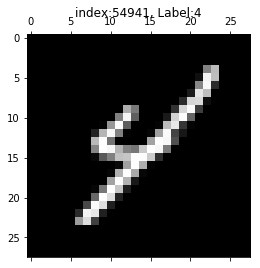

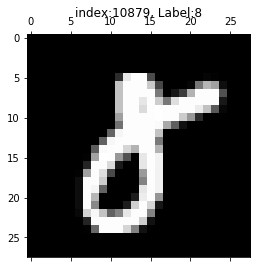

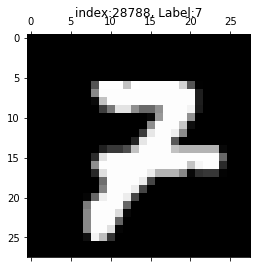

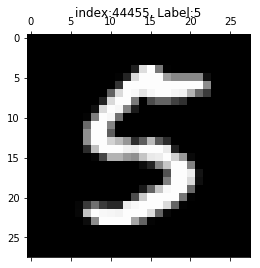

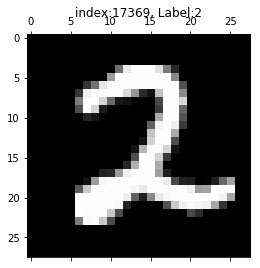

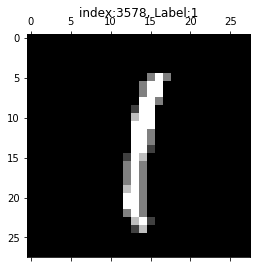

In [33]:
for i in np.random.randint(55000,size=6):
  imgvec=mnist.train.images[i,:]
  labelvec=mnist.train.labels[i,:]
  imgmatrix=np.reshape(imgvec,(28,28))
  label=np.argmax(labelvec)
  
  plt.matshow(imgmatrix,cmap=plt.get_cmap("gray"))
  plt.title("index:%d, Label:%d" %(i,label))

#  Y = softmax( W*X + b) 
# Hypothesis= tf.nn.softmax(tf.matmul(X,W)+b)

In [34]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets("mnist_data",one_hot=True)## one_hot 형태로


Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [0]:
X=tf.placeholder(tf.float32,[None,784])
Y=tf.placeholder(tf.float32,[None,10])

W=tf.Variable(tf.zeros([784,10])) # tf.zeros = 784,10 의 전체를 0 으로 초기화 잡아줌.
b=tf.Variable(tf.zeros([10]))

logit_y=tf.matmul(X,W)+b # linear form. somehow(?)

In [0]:
softmax_y=tf.nn.softmax(logit_y)
cross_entropy=tf.reduce_mean(-tf.reduce_sum(Y*tf.log(softmax_y),reduction_indices=[1]))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
# w 에 대한 Cost 함수 미분

In [0]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [0]:
for i in range(1000):
  batch_x, batch_y=mnist.train.next_batch(100) # batch 사이즈를 백개씩
  sess.run(train,feed_dict={X:batch_x, Y:batch_y})

In [0]:
correct_prediction=tf.equal(tf.argmax(softmax_y,1),tf.argmax(Y,1))# argmax 는 그 위치를 말한다. 
# 이때  Y 는 one-hot 으로 0, 1 이고 softmax_y 는 0-1사이의 값.
accuracy=tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [57]:
print("accuracy is", sess.run(accuracy,feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

accuracy is 0.9091


In [60]:
df=pd.DataFrame(mnist.test.images)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# REUL (Rectified Linea Unit)
hypo=tf.nn.relu(tf.matmul(X,W)+b)

 activation function should be like non-linear to make multi-layer effect, so use minimum one non-linear for mulit-layer

# array

In [70]:
import tensorflow as tf
x=tf.constant([[1,2,3],[2,5,7], [2,2,2]])
w=tf.constant([[4],[4],[4]])
y=tf.matmul(x,w)
print(y.get_shape())
print(x.get_shape())
print(w.get_shape())

(3, 1)
(3, 3)
(3, 1)


# TensorFlow 로 안풀리는 게이트 풀기
# XOR GATE with TF

In [0]:
import numpy as np
X_train=np.array([ [0,0],[0,1],[1,0],[1,1] ])
T_train=np.array([[0],[1],[1],[0]])

X=tf.placeholder(tf.float32,[None,2])
T=tf.placeholder(tf.float32,[None,1])


# 은닉층의 노드 몇개가 있을때 좋을까? 10개로 바꿔보라

In [0]:
# input 3 개 hidden layer가 10개 은닉층 노드가 10개
W1=tf.Variable(tf.truncated_normal([2,10]))
b1=tf.Variable(tf.zeros([10]))
W2=tf.Variable(tf.truncated_normal([10,1]))
b2=tf.Variable(tf.zeros([1]),dtype=tf.float32)

In [0]:
A1=tf.matmul(X,W1)+b1
Z1=tf.sigmoid(A1)

A2=tf.matmul(Z1,W2)+b2
Z2=tf.sigmoid(A2)

In [0]:
Cost=tf.reduce_mean(tf.reduce_sum(tf.square(Z2-T),1))
train=tf.train.GradientDescentOptimizer(0.1).minimize(Cost)

In [0]:
predict=Z2


In [0]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [91]:
for i in range(5000):
  if i%200 == 0:
    _train,_Cost=sess.run([train,Cost],feed_dict={X:X_train,T:T_train})
    print("cost:", _Cost)
  
_predict=sess.run([predict],feed_dict={X:X_train})

cost: 0.0025818383
cost: 0.0025814301
cost: 0.0025810194
cost: 0.0025806138
cost: 0.0025802047
cost: 0.0025797933
cost: 0.002579386
cost: 0.002578978
cost: 0.0025785663
cost: 0.0025781617
cost: 0.0025777528
cost: 0.0025773454
cost: 0.002576938
cost: 0.0025765293
cost: 0.0025761237
cost: 0.0025757162
cost: 0.0025753083
cost: 0.002574904
cost: 0.0025744936
cost: 0.0025740894
cost: 0.0025736827
cost: 0.0025732748
cost: 0.0025728666
cost: 0.0025724599
cost: 0.002572056


In [92]:
print("predict=",_predict)
print("result=",np.array(np.array(_predict)>0.5,np.int))

predict= [array([[0.05145583],
       [0.9505032 ],
       [0.94791734],
       [0.04976312]], dtype=float32)]
result= [[[0]
  [1]
  [1]
  [0]]]


# 레이어는 은닉층들의 집합. 각각 히든 레이어의노드 갯수가 다르다.


#MNIST 맛보기

In [93]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets("mnist_data",one_hot=True)## one_hot 형태로

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [0]:
X=tf.placeholder(tf.float32,[None,784])
Y=tf.placeholder(tf.float32,[None,10])

w1=tf.Variable(tf.random_normal([784,256],stddev=0.01))
L1=tf.nn.relu(tf.matmul(X,w1))

w2=tf.Variable(tf.random_normal([256,256],stddev=0.01))
L2=tf.nn.relu(tf.matmul(L1,w2))

w3=tf.Variable(tf.random_normal([256,10],stddev=0.01))
model=tf.matmul(L2,w3)

# Batch, Epoch

train set을 한번 돌리는게 1 epoch, 이고 데이터는 한번에 1batch 로 돌린다. 이때 total batch는 total size/batch size= n 개의 batch. 그래서 이 batch가 n 번 돌아가는게 1 epoch. 

더하여 iteration은 batch를 몇번을 돌릴것인가를 물어보는것 이다.

In [0]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))
optimizer=tf.train.AdamOptimizer(0.005).minimize(cost)

In [0]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

batch_size=100
total_batch=int(mnist.train.num_examples/batch_size)

In [124]:
for epoch in range(15):
  total_cost=0
  
  for i in range(total_batch):
    batch_x,batch_y=mnist.train.next_batch(batch_size)
    
    _,cost_val=sess.run([optimizer,cost],feed_dict={X:batch_x, Y:batch_y})
    total_cost+=cost_val
    
  print("Epoch:", "%04d"% (epoch+1), "Avg.cost=", "{:.3f}".format(total_cost/total_batch))
    
print("done for optimization")

Epoch: 0001 Avg.cost= 0.253
Epoch: 0002 Avg.cost= 0.113
Epoch: 0003 Avg.cost= 0.082
Epoch: 0004 Avg.cost= 0.072
Epoch: 0005 Avg.cost= 0.061
Epoch: 0006 Avg.cost= 0.052
Epoch: 0007 Avg.cost= 0.049
Epoch: 0008 Avg.cost= 0.047
Epoch: 0009 Avg.cost= 0.043
Epoch: 0010 Avg.cost= 0.047
Epoch: 0011 Avg.cost= 0.040
Epoch: 0012 Avg.cost= 0.035
Epoch: 0013 Avg.cost= 0.035
Epoch: 0014 Avg.cost= 0.035
Epoch: 0015 Avg.cost= 0.028
done for optimization


In [125]:
is_correct=tf.equal(tf.argmax(model,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))

print("정확도:", sess.run(accuracy,feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

정확도: 0.9769
